<a href="https://colab.research.google.com/github/Prakhar967/Yulu_business_case/blob/main/Yulu_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import pearsonr  , spearmanr

# **About YULU**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affectng the demand for these shared electric cycles in the Indian market.

# **OBJECTIVE:-**
## 1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
## 2. How well those variables describe the electric cycle demands

## Loading the data

In [ ]:
df = pd.read_csv('yulu.csv')      #loading the data

## Shape

In [ ]:
df.shape              #shape of data

(10886, 12)

**Shape -**  There are 10886 rows and 12 columns

## columns

In [ ]:
df.columns.tolist()

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

## Details about columns
1. datetime: datetime
2. season: season (1: spring, 2: summer, 3: fall, 4: winter)
3. holiday: whether day is a holiday or not
4. workingday: if day is neither weekend nor holiday is 1, otherwise is 0
5. weather:
    1. Clear, Few clouds, partly cloudy, partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light  Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
6. temp: temperature in Celsius
7. atemp: feeling temperature in Celsius
8. humidity: humidity
9. windspeed: wind speed
10. casual: count of casual users
11. registered: count of registered users
12. count: count of total rental bikes including both casual and
registered

In [ ]:
df.info()                         # data types and entries in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## Converting suitable columns into category,  date time

In [ ]:
convert = ['season','holiday','workingday','weather']
for i in convert:
  df[i] = df[i].astype('category')

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


**Insight:**
1. There are total of 10886 entries.
2. 977 bikes are registered(including casual and registered) where on an average 192 are registered in daily basis.
3. Average tempreature when they rent bikes arr 20 Celcius with a feeling tempreature of 24 celcius
4. on an average customers rent their bikes when average windspeed is 13
5. on an average customer rent yulu bikes when average humidity is about 62

## Unique Values

In [ ]:
for  j in df.columns:
  print(j)
  print(df[j].nunique())
  print()

datetime
10886

season
4

holiday
2

workingday
2

weather
4

temp
49

atemp
60

humidity
89

windspeed
28

casual
309

registered
731

count
822



In [ ]:
df['workingday'].unique()

[0, 1]
Categories (2, int64): [0, 1]

# Value counts

variation of yulu bikes across different seasons

In [ ]:
df['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


variation of yulu bikes across holidays

In [ ]:
df['holiday'].value_counts()          # 0 for no holiday and 1 for holiday

,count
holiday,
0,10575
1,311


variation of yulu bikes across working days

In [ ]:
df['workingday'].value_counts()   # 1 for working day and 0 otherwise

,count
workingday,
1,7412
0,3474


variation of yulu bikes across different weather

In [ ]:
df['weather'].value_counts()              # 1. Clear, Few clouds, partly cloudy, partly cloudy
                                          # 2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                                          # 3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                                          # 4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

,count
weather,
1,7192
2,2834
3,859
4,1


## Checking the null values

In [ ]:
df.isnull().sum()                     # There are no null values

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


## Checking for outliers

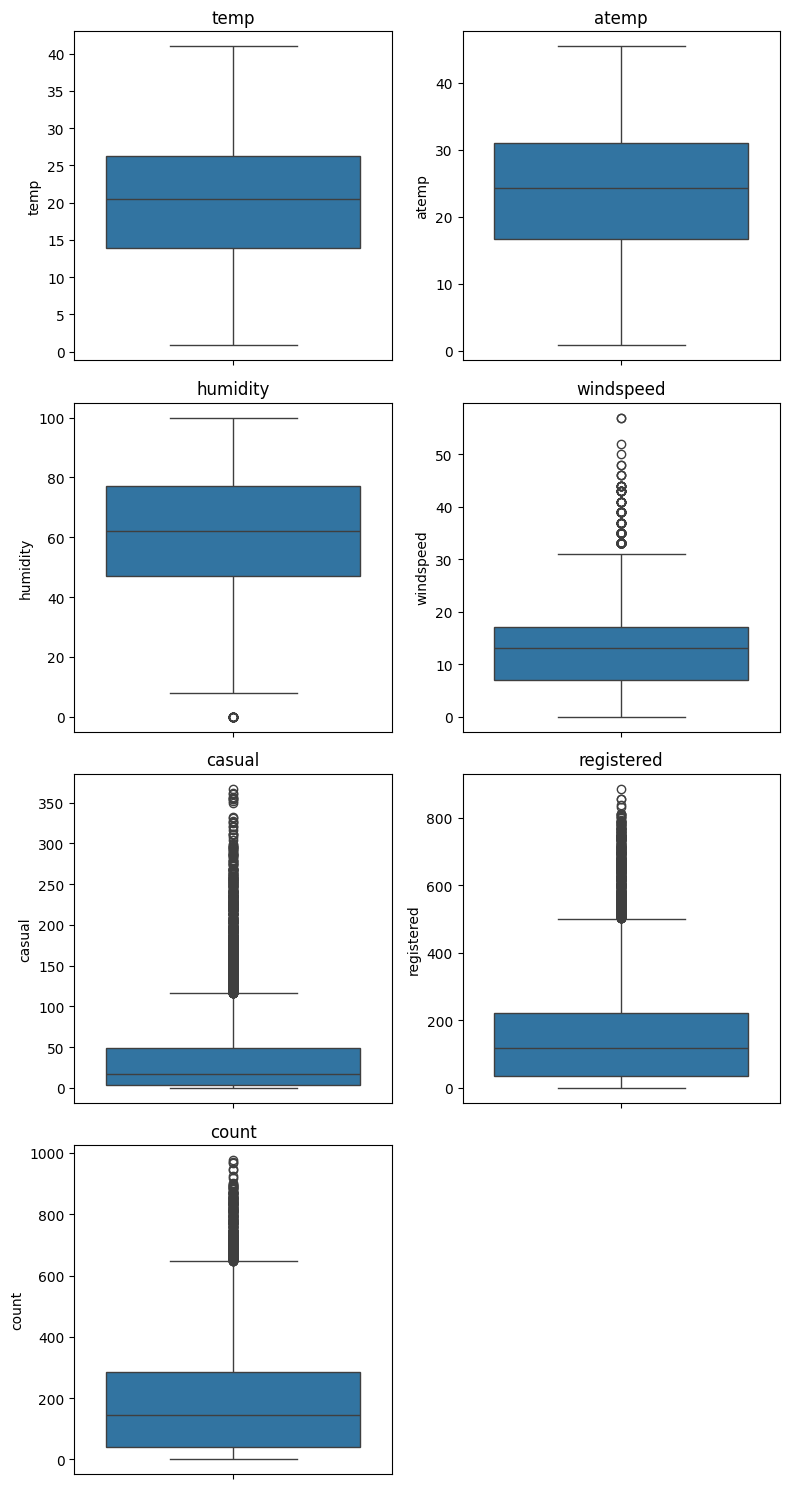

In [ ]:
col = ['temp','atemp','humidity','windspeed','casual','registered','count']
plt.figure(figsize=(8,15))
for i,j in enumerate(col,1):
  plt.subplot(4,2,i)
  plt.title(j)
  sns.boxplot(data = df , y = j)
plt.tight_layout()
plt.show()

Insight: we can see that windspeed , casual , registered and count have certain outliers.

## Mentioning those outliers

In [ ]:
data = ['windspeed','casual','registered','count']
for i,j in enumerate(data,1):
  print(j)
  q1 = df[j].quantile(0.25)
  q3 = df[j].quantile(0.75)
  iqr = q3-q1
  max  = q3+1.5*iqr
  min  = q1-1.5*iqr
  outlier = df[(df[j]>max) | (df[j]<min)]
  print(outlier)
  print(outlier.shape)
  print()

windspeed
                 datetime season holiday workingday weather   temp   atemp  \
175   2011-01-08 14:00:00      1       0          0       1   8.20   8.335   
178   2011-01-08 17:00:00      1       0          0       1   6.56   6.060   
194   2011-01-09 09:00:00      1       0          0       1   4.92   3.790   
196   2011-01-09 11:00:00      1       0          0       1   6.56   6.060   
265   2011-01-12 12:00:00      1       0          1       1   8.20   7.575   
...                   ...    ...     ...        ...     ...    ...     ...   
10013 2012-11-02 14:00:00      4       0          1       2  16.40  20.455   
10154 2012-11-08 12:00:00      4       0          1       1  16.40  20.455   
10263 2012-11-13 01:00:00      4       0          1       3  18.04  21.970   
10540 2012-12-05 14:00:00      4       0          1       1  19.68  23.485   
10853 2012-12-18 15:00:00      4       0          1       1  18.86  22.725   

       humidity  windspeed  casual  registered  count

**Insight:** in windspeed we have **277** outliers , in casual we have **749** outliers , in registered we have **423** outliers and in count we have **300** outliers

## Handling those outliers

In [ ]:
df_clip = df.copy()

In [ ]:
data = ['windspeed','casual','registered','count']
for i in data:
  lower_limit  = df_clip[i].quantile(.05)
  upper_limit = df_clip[i].quantile(.95)
  df_clip[i] = df_clip[i].clip(lower = lower_limit , upper =upper_limit )

### Checking those outliers in my clipped data

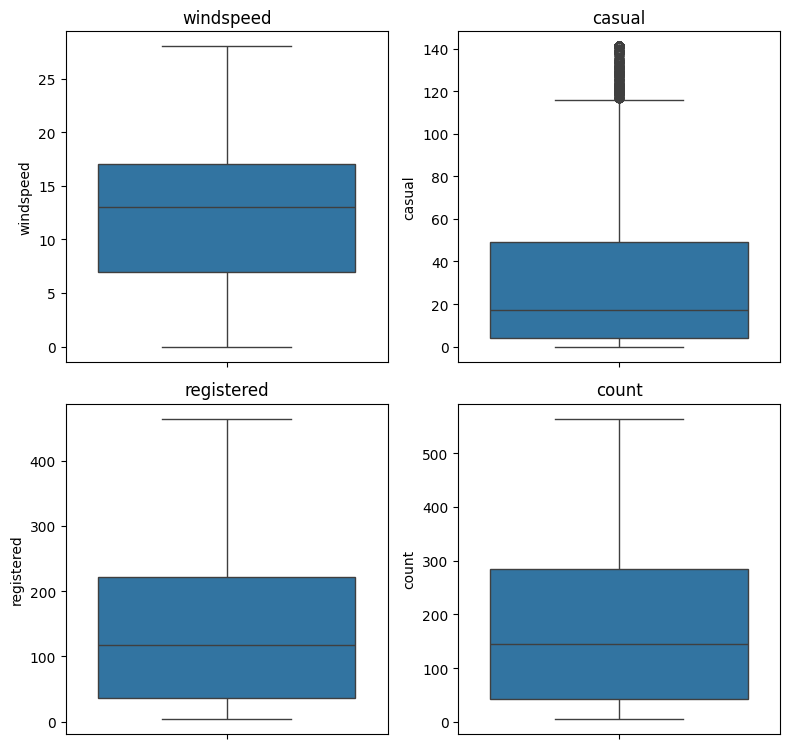

In [ ]:
plt.figure(figsize=(8,15))
for i,j in enumerate(data,1):
  plt.subplot(4,2,i)
  plt.title(j)
  sns.boxplot(data = df_clip , y = j)
plt.tight_layout()
plt.show()


**Insights:** Beside casual column we have solved outlier issue for every other column

Text(0.5, 1.0, 'Casual data after capping')

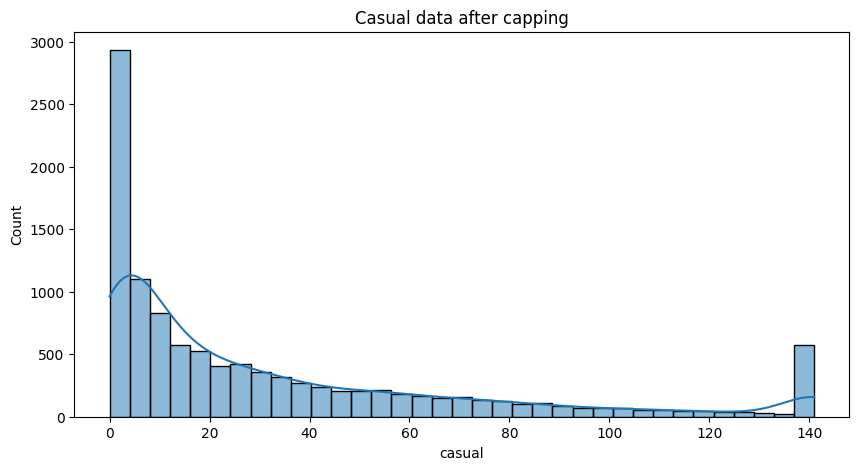

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_clip['casual'],kde = True)                    # lets check with histplot for casual column after clipping
plt.title('Casual data after capping')

lets search for the cause of this outliers


In [ ]:
print('dates for 130 ')                                           #dates when 130-140 casual user took YULU bike
print(df_clip[df_clip['casual']==130]['datetime'].dt.date)
print()
print('dates for 140')
print(df_clip[df_clip['casual']==140]['datetime'].dt.time)

dates for 130 
3278    2011-08-06
3281    2011-08-06
3304    2011-08-07
4286    2011-10-10
8984    2012-08-16
9648    2012-10-06
Name: datetime, dtype: object

dates for 140
6658    17:00:00
6723    10:00:00
7494    15:00:00
9106    19:00:00
Name: datetime, dtype: object


In [ ]:
print('Dates for 0 in casual')                                          # dates when 0 casual user took yulu bikes
print(df_clip[(df_clip['casual']==0)]['datetime'].dt.date)

Dates for 0 in casual
4        2011-01-01
5        2011-01-01
29       2011-01-02
30       2011-01-02
31       2011-01-02
            ...    
10838    2012-12-18
10839    2012-12-18
10841    2012-12-18
10843    2012-12-18
10865    2012-12-19
Name: datetime, Length: 986, dtype: object


In [ ]:
casual_0_workingday = df_clip[df_clip['casual']==0]['workingday']        # categorizing on the basis of workingday,weather,season,holiday
casual_0_weather = df_clip[df_clip['casual']==0]['weather']              # to understand the trend is there any siginificant relation
casual_0_season = df_clip[df_clip['casual']==0]['season']
casual_0_holiday = df_clip[df_clip['casual']==0]['holiday']


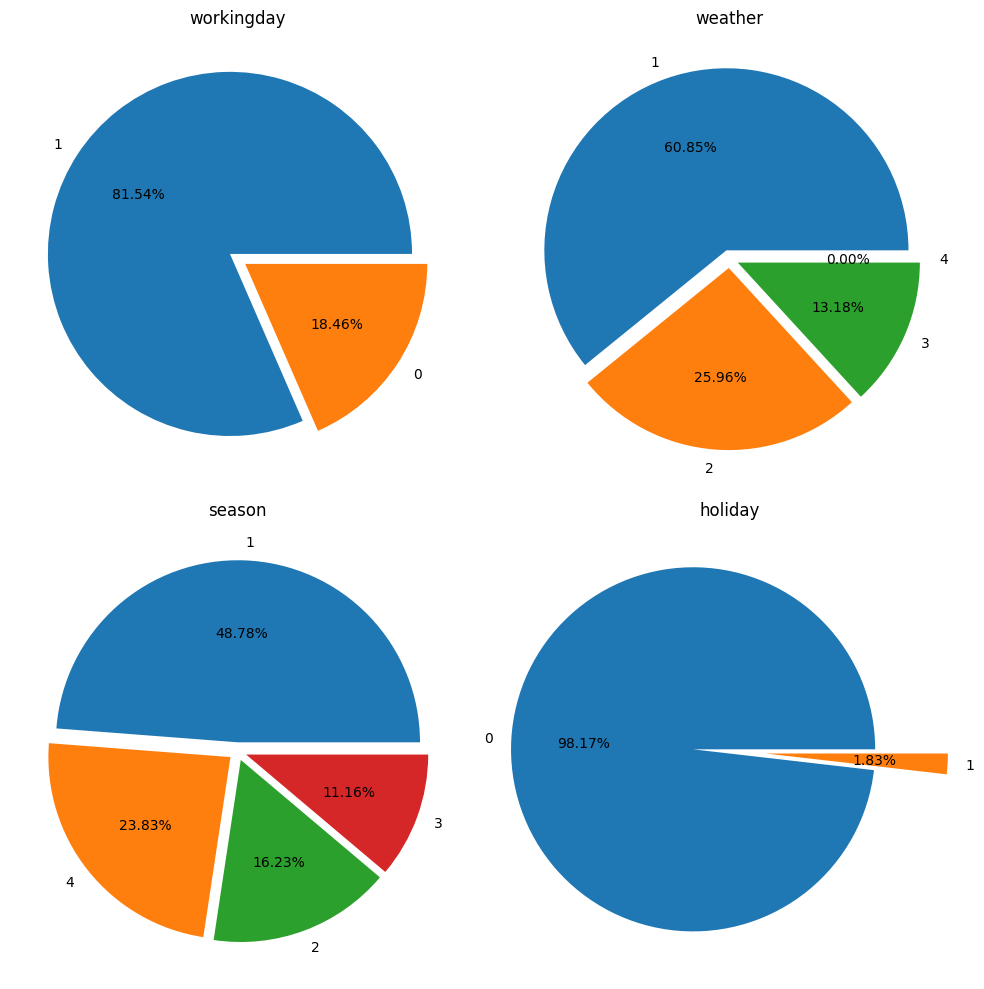

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('workingday')
plt.pie(casual_0_workingday.value_counts(),labels = casual_0_workingday.value_counts().index,autopct = '%.2f%%',explode= [.05,.05])
plt.subplot(2,2,2)
plt.title('weather')
plt.pie(casual_0_weather.value_counts(),labels = casual_0_weather.value_counts().index,autopct = '%.2f%%',explode= [.05,.05,.05,.05])
plt.subplot(2,2,3)
plt.title('season')
plt.pie(casual_0_season.value_counts(),labels = casual_0_season.value_counts().index,autopct = '%.2f%%',explode= [.05,.05,.05,.05])
plt.subplot(2,2,4)
plt.title('holiday')
plt.pie(casual_0_holiday.value_counts(),labels = casual_0_holiday.value_counts().index,autopct = '%.2f%%',explode= [.2,.2])
plt.tight_layout()
plt.show()

**INSIGHT:**
1. The dates when casual user have rented bikes heavily are fewer in number indicating some events , shows , release of an highly anticipated  movie ,might be due to exams , etc
2. The dates when casual user have not rented bikes are more in numbers and we also went deeper into the situation and found that people do not use yulu bikes on working days , partly cloudy , during spring season when it is mostly dry in india . This brings me to a important understanding that casual user use yulu bikes for enjoyable moments like in light rain , on holidays , since this data is collected from the casual user who do not use yulu bikes  so less proportion means that very few are there who do not use yulu bikes in certain situation it means there are more chances that people use yulu bikes in less proportion cases.

**Hence we are going to keep casual, registered user columns,count with outliers as they can provide certain valuable information just like we have got information about casual users**

In [ ]:
df_clip['casual'] = df['casual']             #   we are rolling back the changes for casual users column
df_clip['registered'] = df['registered']     # we are rolling back the changes for registered users column
df_clip['count'] = df['count']               # we are rolling back the hanges for total count column

<Axes: xlabel='windspeed', ylabel='Count'>

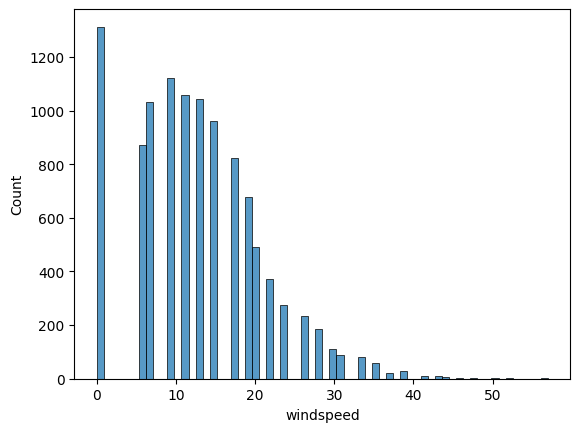

In [ ]:
sns.histplot(df['windspeed'])           #analyzing the original windspeed data

lets check for windspeed also

In [ ]:
df[(df['windspeed']>10) & (df['windspeed']<20)]['datetime'].dt.date

,datetime
10,2011-01-01
11,2011-01-01
12,2011-01-01
13,2011-01-01
14,2011-01-01
...,...
10875,2012-12-19
10876,2012-12-19
10877,2012-12-19
10882,2012-12-19


since we can see that windspeed max range is 57 and min is 0 , also it is not mentioned that windspeed is in m/s or kmphr so looking at the data 10 - 20 if it is in m/s then it suggest high gusty wind and in the cities where yulu bikes are operating we do not encounter such high speed  and this will equate to appox to 36 kmphr(10m/s) and we have 5052 records of these data between 10-20 so it can be confirmed that this data is in km/hr so looking at the data again max windspeed is 59kmphr and it is less in count so considering the operational cities of yulu this seems to be a normal data and within the range so we not going to consider outliers in this case and we will use original data  for our analysis

In [ ]:
df_clip['windspeed'] = df['windspeed']        #rolling back windspeed data also

## Checking for duplicates

In [ ]:
duplicates = df_clip[df_clip.duplicated()]
print(f'No.of duplicated rows: {duplicates.shape[0]}')          #hence there are no duplicate rows in our data
print(duplicates)

No.of duplicated rows: 0
Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []


# Univariate analysis

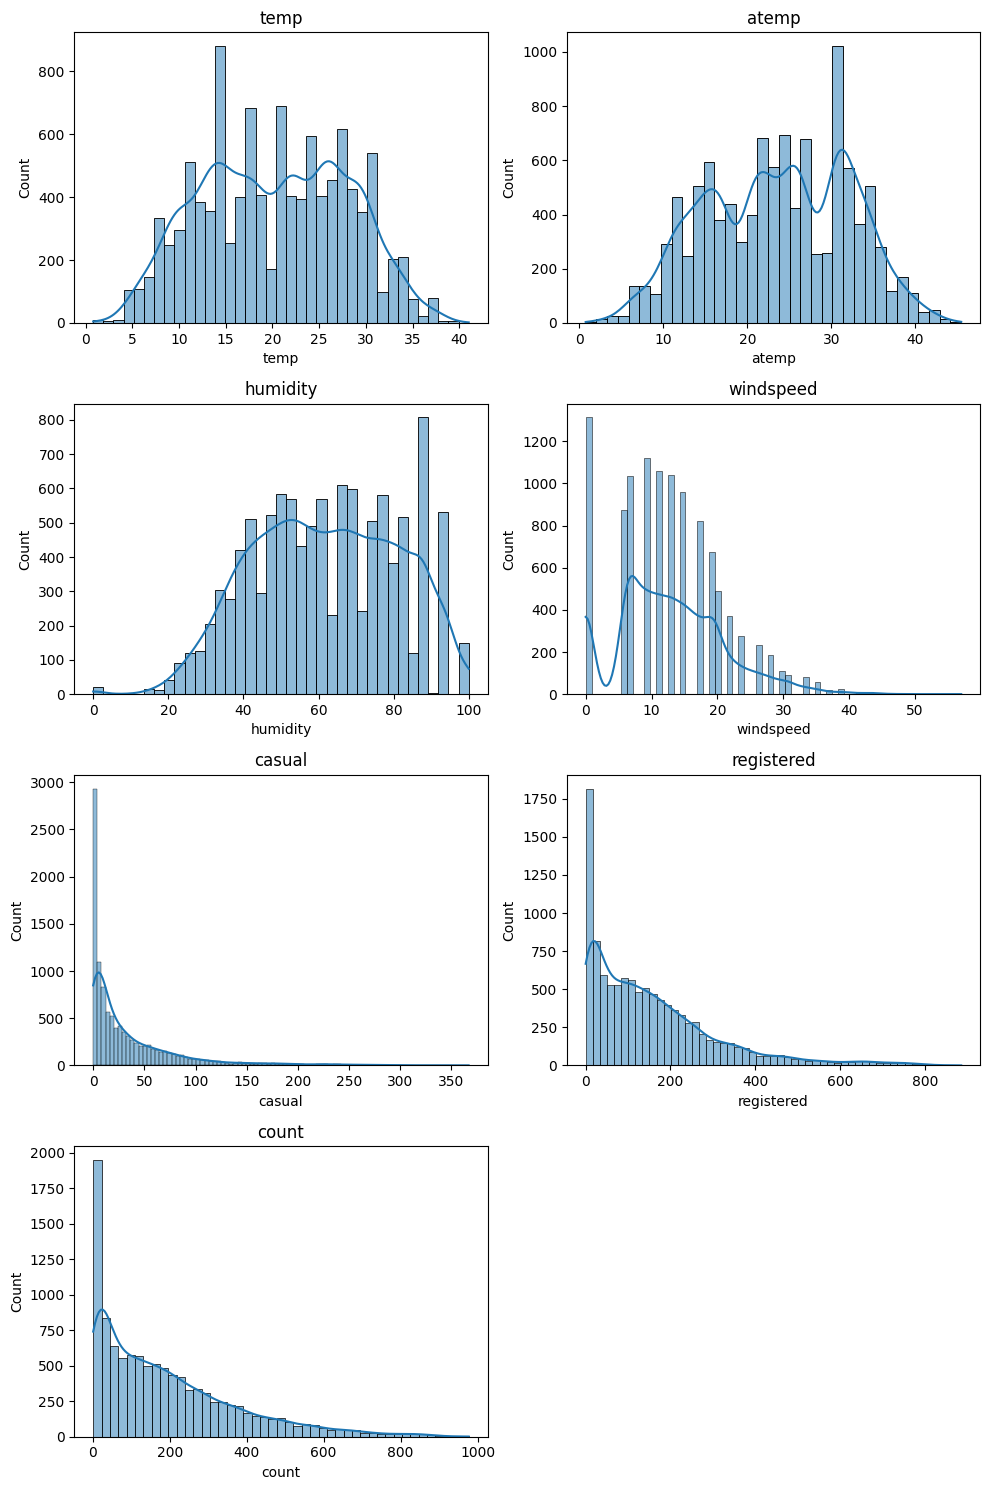

In [ ]:
num = ['temp','atemp','humidity','windspeed','casual','registered','count']
plt.figure(figsize=(10,15))
for i,j in enumerate(num,1):
  plt.subplot(4,2,i)
  plt.title(j)
  sns.histplot(df_clip[j],kde = True)
plt.tight_layout()
plt.show()


**INSIGHTS:**
1. temp , atemp , humidity follows relatively to normal distribution as compared to others
2. casual , registered , count seems to follow log noral distribution
3. windspeed seems to rightly skewed data

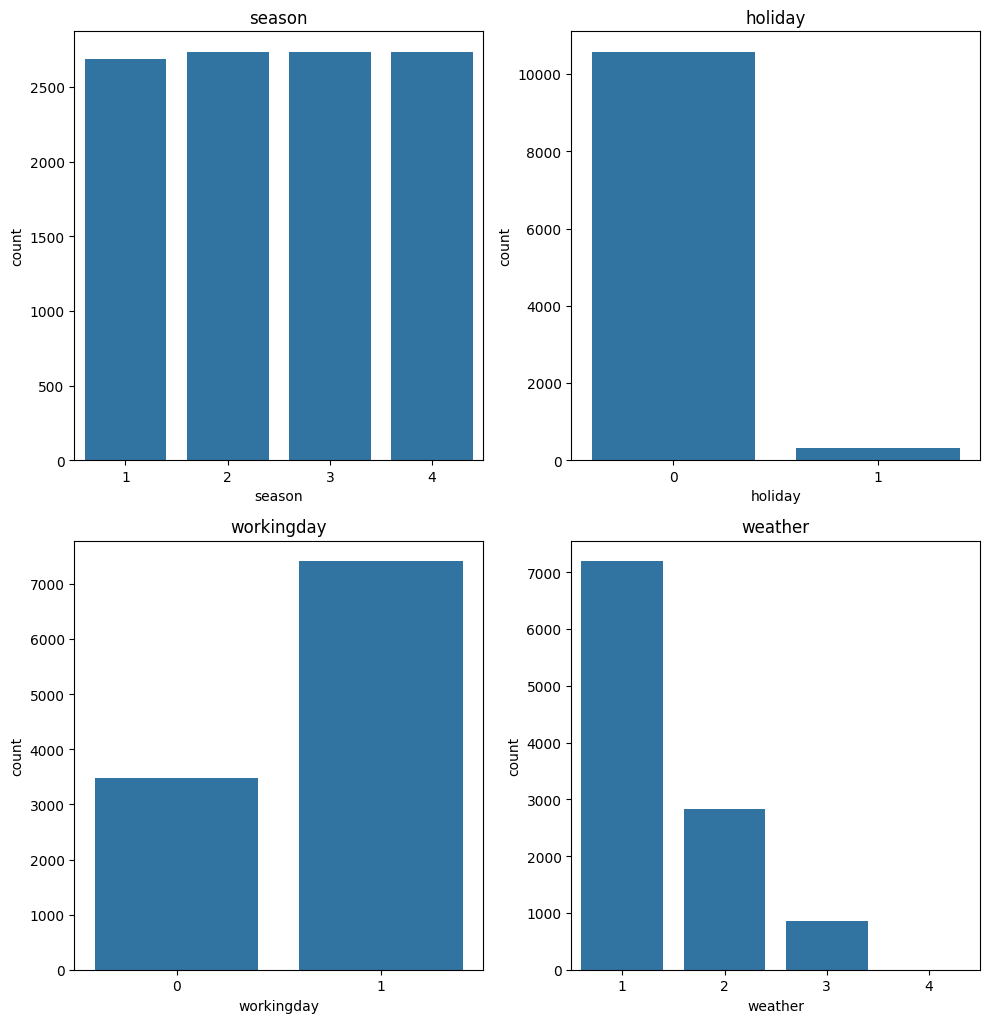

In [ ]:
cat  = ['season','holiday','workingday','weather']
plt.figure(figsize=(10,15))
for i,j in enumerate(cat,1):
  plt.subplot(3,2,i)
  sns.countplot(data = df_clip , x = j)
  plt.title(j)
plt.tight_layout()

**INSIGHTS:** data seems to be normal with equal working days in each season and more no. of working day than holiday with partly cloudy and clear sky is seen most in our data

# Bivariate analysis

season vs count

<ipython-input-35-2443756188>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_clip, x = 'season' , y = 'count', palette = 'coolwarm')


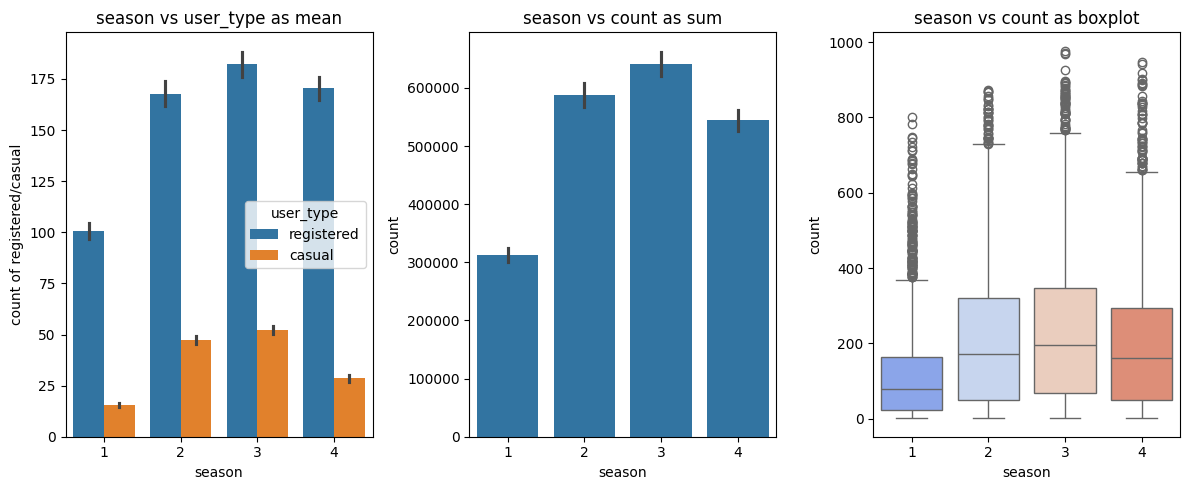

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,3,1)
sns.barplot(data=df_clip.melt(id_vars=['season'], value_vars=['registered', 'casual'],var_name = 'user_type',value_name='count of registered/casual'), x='season', y='count of registered/casual', hue='user_type',estimator = 'mean')
plt.title('season vs user_type as mean')
plt.subplot(1,3,2)
sns.barplot(data = df_clip, x = 'season', y = 'count',estimator = 'sum')
plt.title('season vs count as sum')
plt.subplot(1,3,3)
sns.boxplot(data = df_clip, x = 'season' , y = 'count', palette = 'coolwarm')
plt.title('season vs count as boxplot')
plt.tight_layout()
plt.show()


**INSIGHT:** looking at this plot we can clearly see that registered user are using yulu services more in number as compared to casual user with reltively more number of user in fall for both casual as well as registered. we can also see that in fall IQR and median is higher among all season's IQR and median  this tells  us about the variability of bike rental during fall such as tourist and various festivals like dussehra,durga puja , etc happening during fall becoming the reason for high variablility for bike rentals ,  with next highest in summer and lowest IQR in the month of spring which shows that bike rentals are more consistent in spring season maybe because daily commuters use this sevice but overall total user using bike rentals is less among all season in this particular season(fall) , so yulu can understand this and plan some marketing strategy to increase the sales during fall and with that also they need to understand about other factors affecting in seasons.

weather vs count

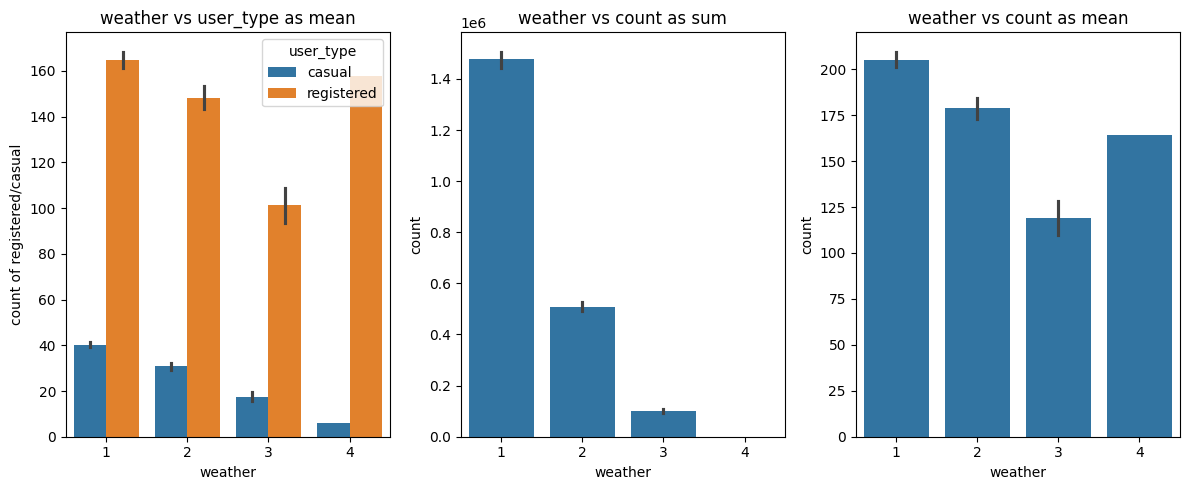

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,3,1)
sns.barplot(data=df_clip.melt(id_vars=['weather'], value_vars=['casual', 'registered'],var_name = 'user_type',value_name='count of registered/casual'), x='weather', y='count of registered/casual', hue='user_type',estimator = 'mean')
plt.title('weather vs user_type as mean')
plt.subplot(1,3,2)
sns.barplot(data = df_clip, x = 'weather', y = 'count',estimator = 'sum')
plt.title('weather vs count as sum')
plt.subplot(1,3,3)
sns.barplot(data = df_clip , x = 'weather', y = 'count',estimator = 'mean')
plt.title('weather vs count as mean')
plt.tight_layout()
plt.show()

**INSIGHT:** from this analysis we can see that on an average more no. of bikes are rented in clear , partly cloudy weather, both for registered as well as casual user ,with light snow and thunderstorm  being the least for registered user and heavy rain being the least for casual user. overall we can see that thunderstorm and heavy rain affected most for both type of users. Yulu can provide them extra protective gear in such weather and we can also check if there is a relation between weather and season  so that we are informed properly and we can provide various type of protective gear for that particular season , updated safe route navigation system and with it some extra safety feature during rainy season like medicalkit ,one touch help so that user may feel more secure and use yulu as a reliable vehicle. As registered user know yulu but for most casual user have not even tried yulu services.

holiday vs count

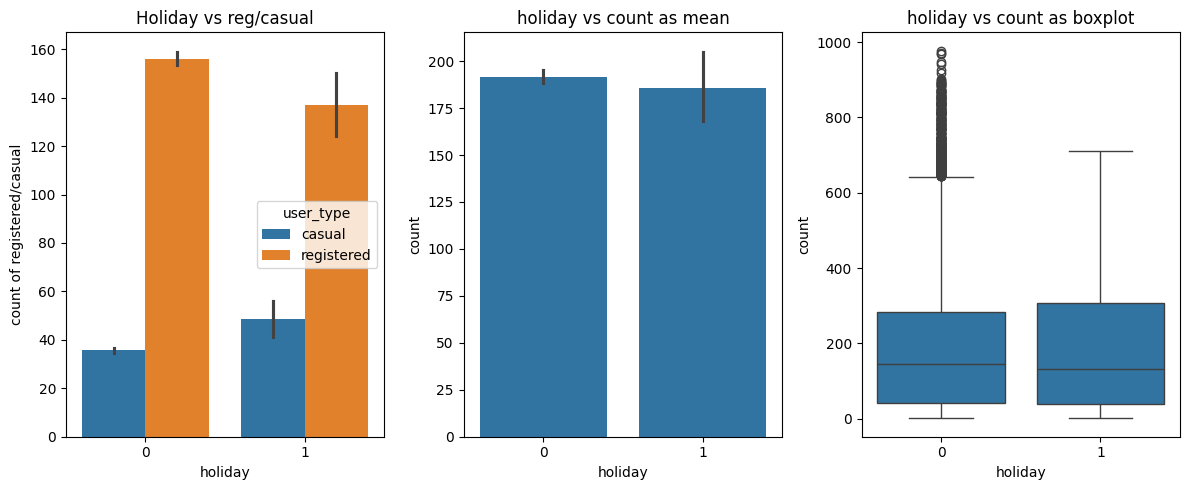

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,3,1)
sns.barplot(data=df_clip.melt(id_vars =['holiday'], value_vars = ['casual', 'registered'],var_name = 'user_type',value_name='count of registered/casual'), x='holiday', y='count of registered/casual', hue='user_type',estimator = 'mean')
plt.title('Holiday vs reg/casual')
plt.subplot(1,3,2)
sns.barplot(data = df_clip, x = 'holiday', y = 'count',estimator = 'mean')
plt.title('holiday vs count as mean')
plt.subplot(1,3,3)
sns.boxplot(data = df_clip , x = 'holiday', y = 'count')
plt.title('holiday vs count as boxplot')
plt.tight_layout()
plt.show()

INSIGHT: users average rate for renting bikes on holiday are very much simiar to the rate on non holiday.We also see that IQR for user on non- holiday is slightly lesser than IQR on holiday which suggest that data is more spread out for holiday user which means bike rental vary more this could be due to different factors like weather condition , special events , tourist , occasional riders on holiday and variatiion is less on non-holiday which means similar number of bike rentals on non- holiday and  predictable patterns in bike usage which means data might represent more regular users who have predictable rental behaviour whereas holiday periods shows mix of users(casual,tourist). we can also see decrease in average rate of rentals for registered user on holiday whereas increase in average rate of rentals for casual users on holiday This depicts that casual user like to use Yulu bikes more for travelling places , watching movie, etc .They are more like a mix group but registered user are more workholic job oriented type using it for their daily use . This way we can customer profile users and  based on that we can curate something that suits both type of users need.


 working day vs count

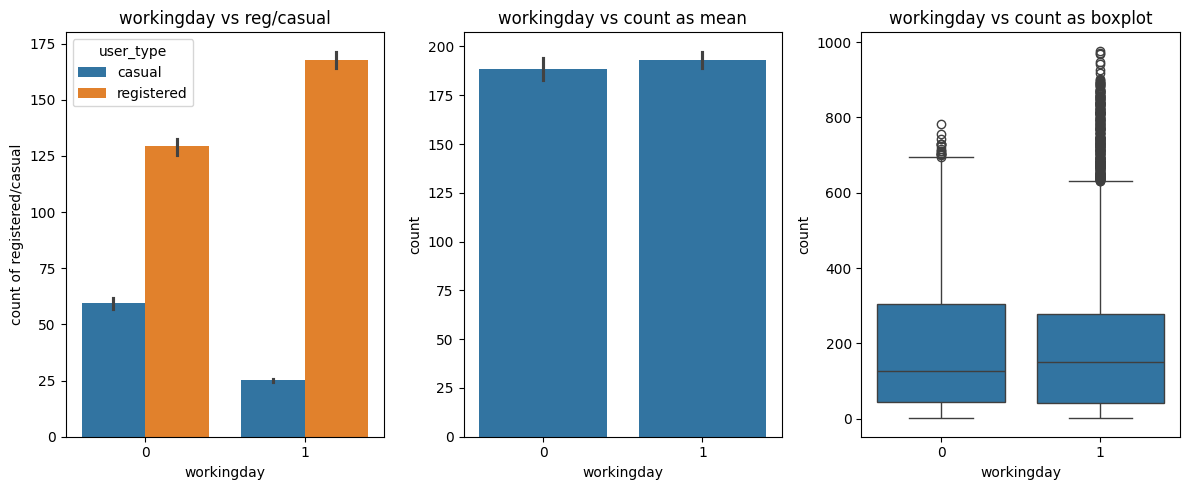

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,3,1)
sns.barplot(data=df_clip.melt(id_vars =['workingday'], value_vars = ['casual', 'registered'],var_name = 'user_type',value_name='count of registered/casual'), x='workingday', y='count of registered/casual', hue='user_type',estimator = 'mean')
plt.title('workingday vs reg/casual')
plt.subplot(1,3,2)
sns.barplot(data = df_clip, x = 'workingday', y = 'count',estimator = 'mean')
plt.title('workingday vs count as mean')
plt.subplot(1,3,3)
sns.boxplot(data = df_clip , x = 'workingday', y = 'count')
plt.title('workingday vs count as boxplot')
plt.tight_layout()
plt.show()

**INSIGHTS:** from this plot we can see that casual user rent bikes usually less in number on working day as compared to the non-working day and registered users rent bikes usually  more in number on working day as compared to non-working day but if you take the average user that rent bikes including casual and registered on working and non-working day they are nearly same indicating demand is stable across week but the IQR for user who rent bike in non-working day is higher showing more variability among user as compared to IQR on working day. There are many outliers also for working day indicating sudden surges in demands due to occasional events , shows ,etc outliers are also there in non-working day but less in number because on working day office jobs + ocassional events created a sudden spike .This all shows that registered user are likely daily commuters using bikes for work or routine purpose while casual user prefer non-working days suggesting they use bikes more for leisure purpose.

Temp,humidity vs count

In [ ]:
df_clip['temp1'] = pd.cut(df_clip['temp'],bins = [0,10,20,30,40,50])
df_clip['humidity1'] = pd.cut(df_clip['humidity'],bins = [0,20,40,60,80,100])
df_clip['temp1'] = df_clip['temp1'].astype('category')
df_clip['humidity1'] = df_clip['humidity1'].astype('category')

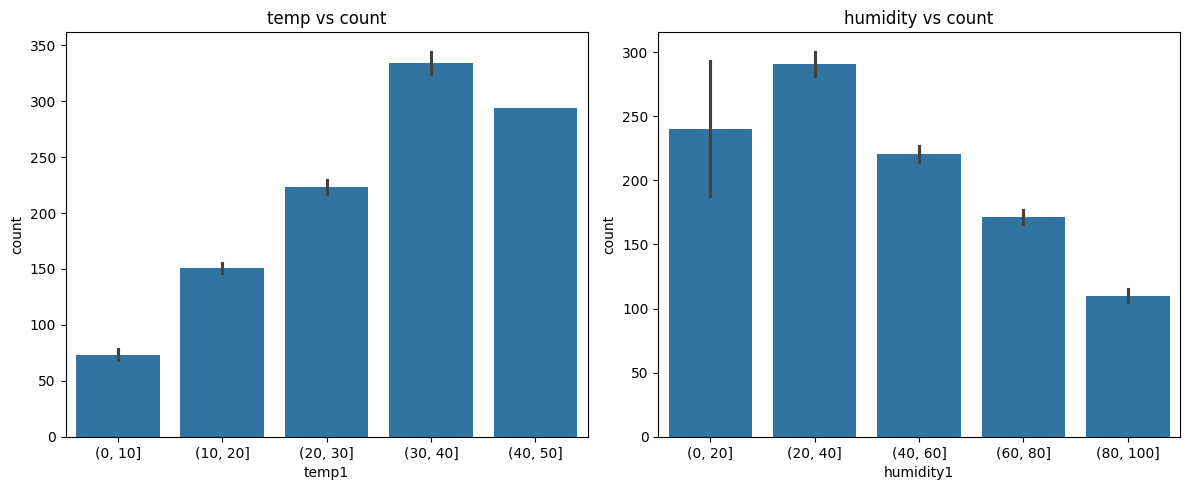

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.barplot(data = df_clip, x = 'temp1', y = 'count')
plt.title('temp vs count')
plt.subplot(1,2,2)
sns.barplot(data = df_clip, x = 'humidity1', y = 'count')
plt.title('humidity vs count')
plt.tight_layout()
plt.show()


**INSIGHT:** from this temp and humidity analysis it is evident that most user love to rent yulu bikes when temp is around 30-40 and humidity is around 20-40 and users least prefer yulu when temp is around 0-10 and himidity is around 80-100 which is very high.weather conditions might influence types of trips users are taking and when knowing this fact about 30-40 C and 20-40% humidity yulu bikes can prepare for increased demand during these conditions ensuring sufficient bike availability and yulu should also minimize keeping their more bikes in certain are where temp is around 0-10 and humidity is around 80-100% to reduce operational cost.

<Axes: >

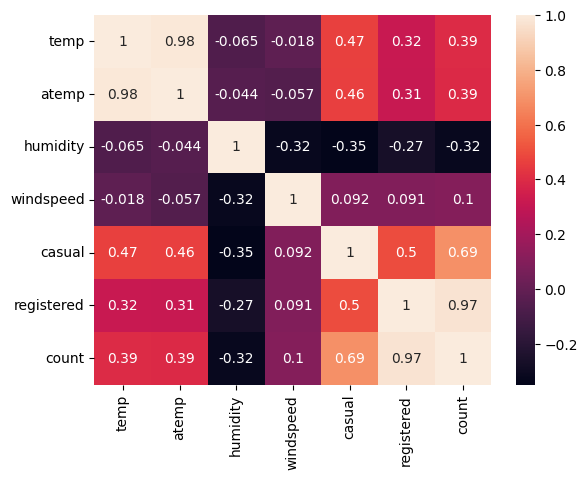

In [ ]:
relation = df_clip.corr(numeric_only=True)
sns.heatmap(relation , annot=True)

**INSIGHT:** we can see that casual and count , temp and atemp, registered and count are highly related. however there is a moderate positive corelation between temp and casual and a negative corelation between humidity and casual aldo humidity and registered.windspeed has very weak corelation with all the variables suggesting wind speed does impact bike rentals. we cal also see high humidity negatively affects both casual and registered user.Aslo temp might become important parameter for casual user although it is moderate but higher than registered user.

# Hypothesis Testing

## Working Day has effect on number of electric cycles rented

### lets check for equal variance

In [ ]:
from scipy.stats import levene

In [ ]:
df_clip['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


In [ ]:
work_day = df_clip.loc[df_clip['workingday'] == 1, 'count']
non_work_day = df_clip.loc[df_clip['workingday'] == 0, 'count']

**Hypothesis for levene:**
1. H0: vaiances are equal
2. H1: variances are different

In [ ]:
levene_stats , p_value = levene(work_day,non_work_day)
print(levene_stats)
print(p_value)

0.004972848886504472
0.9437823280916695


INSIGHT: since p_value comes out to be .943 which is very high therefor we fail to to reject null hypothesis and we can conclude that variances are equal which helps to to cnfirm my equal vaiances assumption

### Lets test for normality

hypothesis:
1. H0:data is gaussian
2. H1:data is not gaussian

significance level = 5%

In [ ]:
from scipy.stats import shapiro

In [ ]:
tstat , pvalue = shapiro(work_day)
print(tstat)
print(pvalue)

0.8702545795617624
2.2521124830019574e-61


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
if pvalue < 0.05:
  print('reject null hypothesis')
else:
  print('fail to reject null hypothesis')

reject null hypothesis


In [ ]:
tstat ,pvalue  = shapiro(non_work_day)
print(tstat)
print(pvalue)

0.885211755076074
4.4728547627911074e-45


In [ ]:
if pvalue < 0.05:
  print('reject null hypothesis')
else:
  print('fail to reject null hypothesis')

reject null hypothesis


In [ ]:
from statsmodels.graphics.gofplots import qqplot

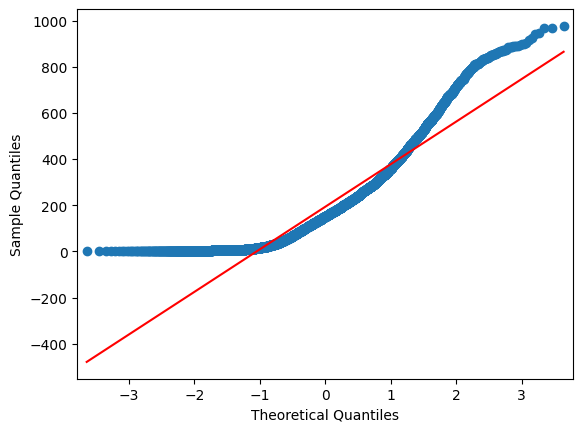

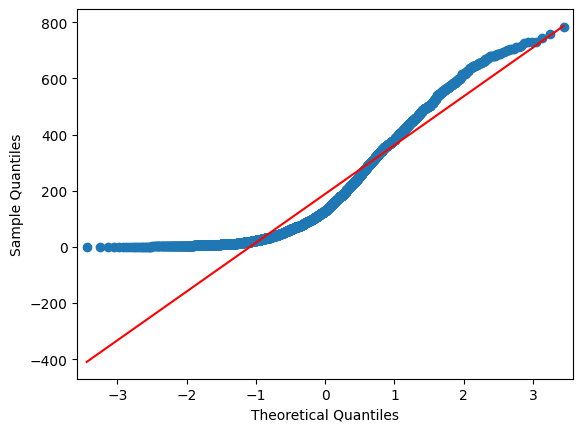

In [ ]:
for i in [work_day , non_work_day]:
  qqplot(i , line ='s')
  plt.show()

**INSIGHT :** we can see here that the two data groups are not normal

In [ ]:
work_day.shape

(7412,)

In [ ]:
non_work_day.shape

(3474,)

The central limit theoram states that for very large samples as here for work_day we have 7412 records and 3474 records for non_work_day which is much greater than 30, the sampling distribution of the mean becomes approximately normal even if the original data is not normal.

T-test is robust to violation of normality when sample size is large

### T-Test independent

In [ ]:
from scipy.stats import ttest_ind

ASSUMPTIONS OF T-TEST:
1. the data points in each group should be independent of each other
2. the data in each group should follow a normal distribution. The assumptions are crucial when sample sizes are small .If the sample sizes is large the central limit theoram allows some flexibility as the distribution of sample means will tend to be normal regardless of the data's underlying distribution
4. Homogenity of variance
5. random sampling

Hypothesis:
1. H0: working day has no effect on number of cycles rented.
2. H1: working day has effect on number of cycles rented.

significance level : 5%

In [ ]:
t_stats , pval = ttest_ind(work_day,non_work_day)
print(t_stats)
print(pval)

1.2096277376026694
0.22644804226361348


In [ ]:
if pval < 0.05:
  print('reject null hypothesis')
else:
  print('fail to reject null hypothesis')

fail to reject null hypothesis


**INSIGHTS :** since p-value is coming out to be greater than significance level hence we fail to reject null hypothesis in other words working day has no effect on number of cycles rented. This means that customers are using bikes other than tradition purpose that is not affected by either it is workdays or weekends it might be possible that people are using it for tourism purpose,etc which are less dependent on workdays or weekends.

## Checking if the demand of bicycles on rent is the same for different Weather conditions?

In [ ]:
clear_weather = df_clip.loc[df_clip['weather'] == 1, 'count']
mist_weather = df_clip.loc[df_clip['weather'] == 2, 'count']
light_snow_weather = df_clip.loc[df_clip['weather'] == 3, 'count']
heavy_rain_weather = df_clip.loc[df_clip['weather'] == 4, 'count']

### Checking for normality

### QQ plot anaysis

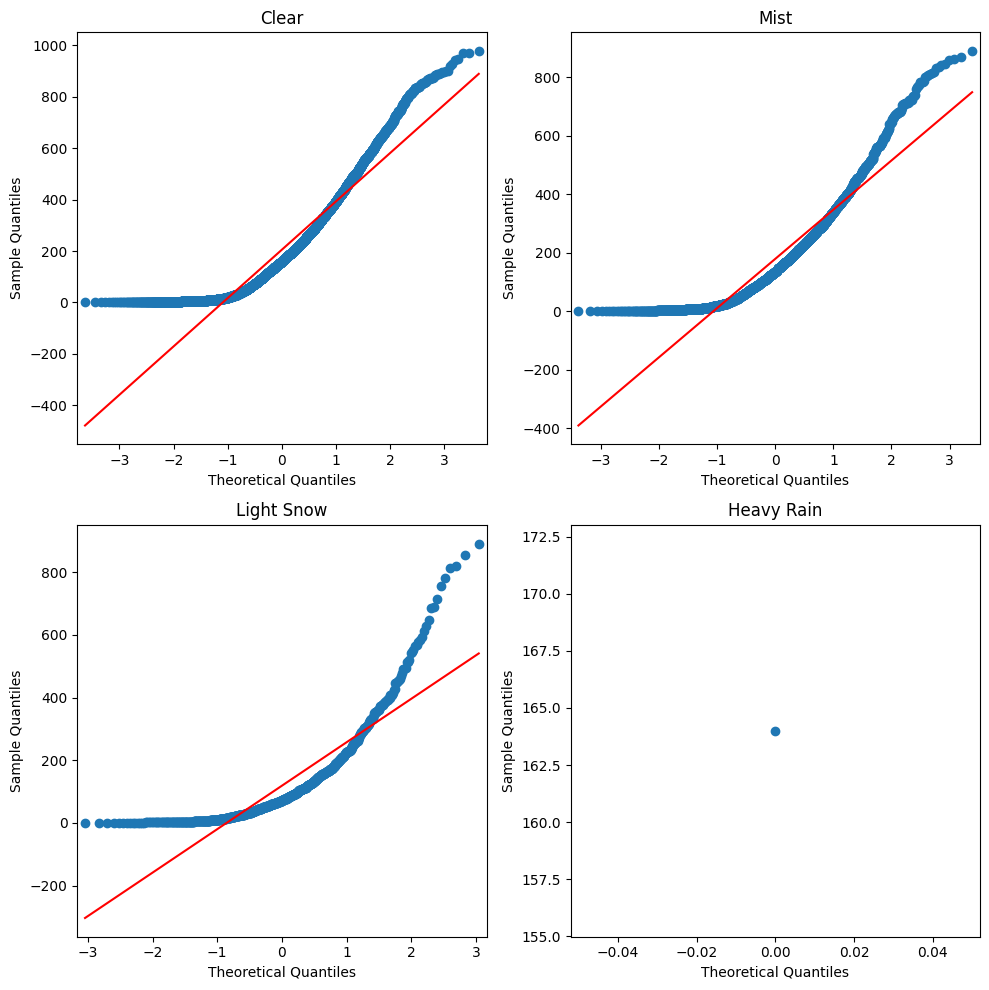

In [ ]:
import statsmodels.api as sm

weather_data = [clear_weather, mist_weather, light_snow_weather, heavy_rain_weather]
titles = ["Clear", "Mist", "Light Snow", "Heavy Rain"]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    sm.qqplot(weather_data[i], line='s', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(titles[i])
plt.tight_layout()
plt.show()


INSIGHT : we can clearly see that all the groups have failed in the normality test

In [ ]:
ts0 = {'clear_weather':clear_weather.skew(),'mist_weather':mist_weather.skew(),'light_snow_weather':light_snow_weather.skew(),'heavy_rain_weather':heavy_rain_weather.skew()}
for i in ts0:
  print(i)
  print(ts0[i])
  print()

clear_weather
1.1398572666918205

mist_weather
1.294444423357868

light_snow_weather
2.1871371080456594

heavy_rain_weather
nan



**INSIGHT:** we can see that weather groups is highly skewed

### Checking for variance

**Hypothesis:**
1. H0: all groups have equal variance
2. H1: all groups have not equal variance

In [ ]:
t_stat , palue = levene(clear_weather,mist_weather,light_snow_weather,heavy_rain_weather)
print(t_stat)
print(pvalue)

54.85106195954556
4.4728547627911074e-45


INSIGHT: groups does not have equal variance

ASSUMPTIONS FOR ANOVA:
1. normal distribution
2. independent records
3. equal variances in different groups

since normality and equal variance test is not satisfied which is 2 out of three assumption for our ANOVA test hence we would go with **kruskal wallis test**.

Kruskal walis is non -parametric alternative to ANOVA which does not assume normality and works well even if variances are unequal

### Kruskal Waliis test

In [ ]:
from scipy.stats import kruskal

ASSUMPTIONS:
1. independent samples
2. dependent variable should be either ordinal or continuous
3. distribution of groups should have similar shape(not necessarily normal)
4. random sampling

Hypothesis:
1. H0: Similar median across all groups
2. H1:different median for atleast one group

In [ ]:
stat , pval = kruskal(clear_weather,mist_weather,light_snow_weather,heavy_rain_weather)
print(stat)
print(pval)

205.00216514479087
3.501611300708679e-44


In [ ]:
if(pval < 0.05):
  print('reject null hypothesis')
else:
  print('fail to reject null hypothesis')

reject null hypothesis


**INSIGHTS:** since P_value is coming out to be very low this means that at least one group have different median than the other in other words electric bike usage is significantly affected by weather conditions.

let us check with one way Anova also and see what results are we getting we already know that **Assumptions are not** met but still lets check if we get opposite result of what we get for krushkal wallis test  

In [ ]:
t_stat , p_value = f_oneway(clear_weather,mist_weather,light_snow_weather,heavy_rain_weather)
print('t_stat=',t_stat)
print('p_value=',p_value)

t_stat= 65.53024112793271
p_value= 5.482069475935669e-42


Stil with anova also p value is very less for any level of significance value

**INSIGHT:** it is sure that demand of bicycle is different for different weather conditions we can leverage this outcome and suggest
1. Yulu to equip their bikes with raincoat ,helmet or other proective gear depending on the weather
2. we can go for SMS alert feature like resturants do like letting potential customers know that their bikes are availble on this route and if it is pleasant weekend you can make their day by giving some offers that seems to be eventually more better option than other means of transport

## Checking if the demand of bicycles on rent is the same for different Seasons?

### Normality Test

In [ ]:
summer = df_clip.loc[df_clip['season'] == 1, 'count']
spring = df_clip.loc[df_clip['season'] == 2, 'count']
fall = df_clip.loc[df_clip['season'] == 3, 'count']
winter = df_clip.loc[df_clip['season'] == 4, 'count']

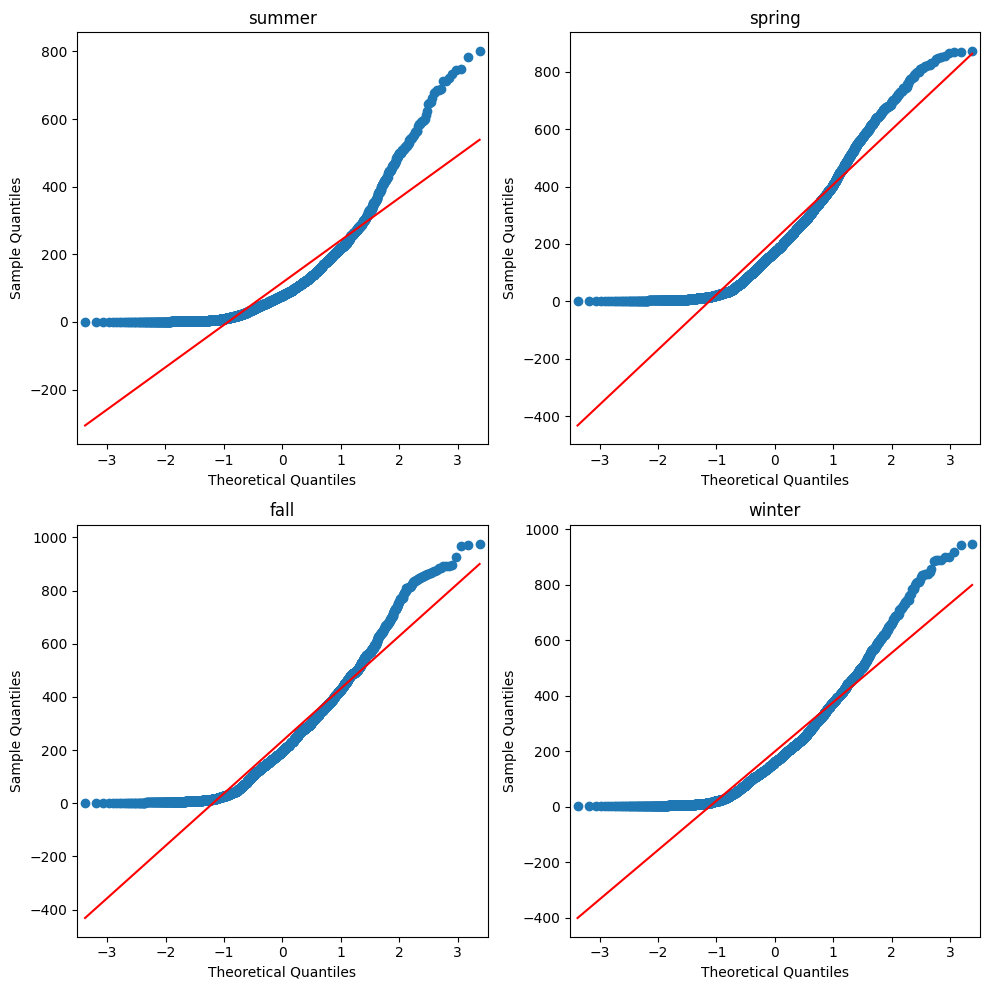

In [ ]:
season_data = [summer ,spring, fall, winter]
titles = ['summer','spring','fall','winter']
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    sm.qqplot(season_data[i], line='s', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(titles[i])
plt.tight_layout()
plt.show()


Skewness check

In [ ]:
ts = {'summer':summer.skew(),'spring':spring.skew(),'fall':fall.skew(),'winter':winter.skew()}
for i in ts:
  print(i)
  print(ts[i])
  print()


summer
1.8880559001782309

spring
1.0032642267278118

fall
0.9914946474772749

winter
1.172117329762622



**INSIGHT:** from normality test and skewness check we can confirm that data is not normal

### equal variance check

**Hypothesis:**
1. all gorups have equal variance
2. At least one group has different variance

lets take significance level at 5%

In [ ]:
levene_stat , pvalue = levene(summer,spring,fall,winter)
print('levene_stat-',levene_stat)
print('pvalue-',pvalue)

levene_stat- 187.7706624026276
pvalue- 1.0147116860043298e-118


In [ ]:
if pvalue < 0.05:
  print('reject null hypothesis, at least one group have different variance')
else:
  print('fail to reject null hypothesis, all groups have same variance')

reject null hypothesis, at least one group have different variance


**INSIGHTS:** since p-value is coming out to be very low hence it suggest that at least one group have different variance.

### ASSUMPTIONS FOR ANOVA:
1. normal distribution.
2. independent records.
3. equal variances in different groups.

Since 2 out 3 conditions are not met hence we not go for ANOVA test. we have to go for **krushkal wallis** test over here.

lets take significance level at 5%

**Hypothesis:**
1. the median demands for bicycles on rent is same across all seasons
2. the median demand for bicycles on rent is different across at least one season

In [ ]:
ks_stat , pval = kruskal(summer,spring,fall,winter)
print('ks_stat-',ks_stat)
print('pval-',pval)


ks_stat- 699.6668548181988
pval- 2.479008372608633e-151


In [ ]:
if pval < 0.05:
  print('reject null hypothesis,demand of bicycle on rent is different for atleast one season')
else:
  print('fail to reject null hypothesis,demand of bicycle n rent is same across all seasons')

reject null hypothesis,demand of bicycle on rent is different for atleast one season


**INSIGHTS:** demands of bicycle is different across different seasons which means that at a particular time of the year there is a peak(might be in summer)
and little less peak (might be in winter) Yulu can leverage this and go for seasonal related marketing strategies like during festive season they can start offering discounts or launch winter special packages and adjusting their bikes fleet according to the seasonal demand.

## Checking if the Weather conditions are significantly different during different Seasons?

since chi-squared is non-parametric test which means it does not rely on the assumptions of normality therfore there is no need for normality test

chi-squared test is a non-parametric test theat deals with categorical data(frequencies or count of categories),not continuous data.Therefore the assumption of equal variance does not apply to chisquared test.

**ASSUMPTIONS OF CHISHQUARED TEST:**
1. data should be categorical
2. observation should be independent
3. expected frequency in each category should be atleast 5
4. no cells with zero frequency

**HYPOTHESIS FOR CHISQUARD TEST:**
1. H0: distribution of weather conditions is independent of seasons
2. H1: distribution of weather conditions depends on seasons

In [ ]:
observed = pd.crosstab(df_clip['season'],df_clip['weather'])
observed

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


NOTE: As we can see from this contingency table that we have only one records in category 4 of the weather which violates the assumption of chisquared test and there are also several column with value 0 hence there are two assumptions that are voilated.

Chisquared with original contingency table

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi_stat,p_value,dof,exp_freq =chi2_contingency(observed)
print('chi_stat-',chi_stat)
print('p_value-',p_value)
print('dof-',dof)
print('exp_freq-',exp_freq)

chi_stat- 49.158655596893624
p_value- 1.549925073686492e-07
dof- 9
exp_freq- [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]


lets say significance level is 5%

In [ ]:
if p_value < .05:
  print('reject null hypothesis,distribution of weather conditions is dependent of seasons')
else:
  print('fail to reject null hypothesis,distribution of weather conditions independent of seasons')


reject null hypothesis,distribution of weather conditions is dependent of seasons


with original contingency table we can see that p- value is too low for any significance level which ultimately means it is more than sufficient proof in our data that weather and season are dependent.

In [ ]:
df_clip['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


In [ ]:
df_clip['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


chisquared with **modified contingency table**

This newly created modified_weather column combines weather 3 and 4 which are both severe weather conditions that are affecting bike rental and this will now create a contigency table fullfilling all assumptions of chisquared test.

In [ ]:
weather_mapping = {1: 1,2: 2,3: '3+4',4: '3+4'}

In [ ]:
df_clip['weather_modified'] = df_clip['weather'].map(weather_mapping)

In [ ]:
df_clip['weather_modified'].value_counts()

,count
weather_modified,
1,7192
2,2834
3+4,860


In [ ]:
df_clip['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


In [ ]:
df_clip['weather_modified'] = df_clip['weather_modified'].astype('category')

In [ ]:
chi2_contingency(pd.crosstab(df_clip['season'],df_clip['weather_modified']))

Chi2ContingencyResult(statistic=np.float64(46.098057769660684), pvalue=np.float64(2.8304096630424703e-08), dof=6, expected_freq=array([[1774.54638986,  699.25812971,  212.19548043],
       [1805.59764836,  711.49384531,  215.90850634],
       [1805.59764836,  711.49384531,  215.90850634],
       [1806.25831343,  711.75417968,  215.98750689]]))

we see that with  modified weather column we still see very low pvalue which is rejecting null hypothesis

**INSIGHT:** we can now be very much sure of this that weather conditon is dependent on season and yulu bikes can leverage this

1. if certain weather conditions are more common in particular season ,so yulu can anticipate demand for that season before and plan accordingly.
2. yulu can also go for weather based pricing  with discounts offered in bad weather condtion.
3. yulu can schedule more routine maintainence service for their bikes depending on the weather conditon and season so that bike can remain fully functional in every season and weather.

# RECOMMENDATIONS:
1. from the analysis it is evident that bike rentals is dependent on weather with highest in clear sky and least in rain and thunderstorm which tells me that Yulu can increase bike availability in clear sky by deploying more bikes at high demand location and they can also offer discount during extreme weather conditions they can also provide more safety loaded features in their app or even in their bikes to help understand customer that not only they offer cheap price during hard times but also look for safety of the customer with more advanced feature this will build trust in customers and eventually generate revenue from these situation also.
2. provide discounts for longer route in favourable weather conditions to promote that yulu bikes offer effective  cheaper transport for longer routes as compared to other means of transport
3. location that is very much crowded like people who come to other cities for studying ,job, offer needed much more convinient and cheaper mode of transport we can provide more bikes to that places and at specific location where it is more than 70% sure people will take YULU ,and obviously this can be done woth proper research from marketing team
4. people often prefer to rent bikes in  temp ranging from 30-40 C and humidity of 20-40% which again tells that during these period we can increase no. of bikes to increase revenue generation from increasing demand and lower no. of bikes where temp is around 0-10 and 80-100% humidity to not spend over at wrong location because there is an operational and maintainence cost involved in both scenarios.
5. we have seen that there is more variance for non working day which tells us that variety of people are using Yulu bikes on that day for leisure , recreational activities , sight seeing etc. Yulu can go for optomize bike deployment to shift focus to recreational parks on non working days making sure that sufficient no. of bikes with proper maintainence are available on that day , they can also slightly increase price in high demand to maximize their gain from this opportunity.
6. as registered users are using yulu bikes more so yulu's goal should be to retain and engage registered user by giving them members only perks like additional discount , cashback ,priority support aslo mechanism of points redemption their goal should also be to convert casual user into registered user by offering discount or free rides for certain number of times , now a days user also see feature rich product  so yulu has to update or enhance with latest technology so that their user may feel safe and comfortable at all times.
7. since we have used krushkal wallis test and determined that season have effent on bike rentals and users rent bikes more often during fall we can deploy more bikes during high demands, we can also curate special fall packages ,launchinf offers on weekdays and weekands during fall ,etc we have to do even more to make use of this opportunity to generate more revenue
8. we have also seen high variance during fall so yulu have to first understand this vaiance trend during fall like which area,time, date , any festivals lining or other factors tht is promoting this hig variance during this season and they can use dynamic pricing depending upon certain situation and area to generate most out of it.they can also offer discounts to promote affordable ride when needed during this season.

